<a href="https://colab.research.google.com/github/light5551/google-colab-examples/blob/master/gym_visualiization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!rm -rf gym-duckietown/
branch = "daffy" #@param ['master', 'daffy']
! git clone --branch {branch} https://github.com/duckietown/gym-duckietown
!pip install  gym-duckietown/.

Cloning into 'gym-duckietown'...
remote: Enumerating objects: 5969, done.
remote: Counting objects: 100% (250/250), done.
remote: Compressing objects: 100% (131/131), done.
remote: Total 5969 (delta 120), reused 189 (delta 84), pack-reused 5719
Receiving objects: 100% (5969/5969), 79.13 MiB | 30.09 MiB/s, done.
Resolving deltas: 100% (3429/3429), done.
Processing ./gym-duckietown
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for duckietown-gym-daffy: filename=duckietown_gym_daffy-6.1.16-py3-none-any.whl size=130328 sha256=84692496e02c4257fe476342c3995dba43e276e24df95e7c682f53c5ca2dfbb3
  Stored in directory: /root/.cache/pip/w

In [3]:
!pip install pyvirtualdisplay
!pip install piglet
!apt-get install python-opengl -y
!apt install xvfb -y
!apt-get install x11-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-opengl is already the newest version (3.1.0+dfsg-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.19.6-1ubuntu4.9).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
x11-utils is already the newest version (7.7+3build1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [4]:
from pyvirtualdisplay import Display
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
def create_display():
    display = Display(visible=False, size=(1400, 900))
    d = display.start()
    if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
        !bash ../xvfb start
        %env DISPLAY=:1
    return d

display = create_display()
from gym_duckietown.envs import DuckietownEnv
from gym_duckietown.simulator import Simulator
import gym
import numpy as np
import pyglet

DEBUG:commons:version: 6.1.7 *
INFO:typing:version: 6.1.8
DEBUG:duckietown_world:duckietown-world version 6.2.24 path /usr/local/lib/python3.7/dist-packages
INFO:geometry:version: 2.0.5
DEBUG:aido_schemas:aido-protocols version 6.0.41 path /usr/local/lib/python3.7/dist-packages
INFO:nodes:version 6.2.4 path /usr/local/lib/python3.7/dist-packages pyparsing 2.4.7
DEBUG:gym-duckietown:gym-duckietown version 6.1.16 path /usr/local/lib/python3.7/dist-packages



In [11]:
display

In [5]:

map_list = ["straight_road", "4way", "udem1", "small_loop", "small_loop_cw", "zigzag_dists", "loop_obstacles", "loop_pedestrians"]
seed = 1
map_name = "udem1"
draw_curve = False
draw_bbox = False
domain_rand = False
frame_skip = 1
distortion = False
camera_rand = False
dynamics_rand = False

DEBUG:gym-duckietown:[2.34944265 0.         1.90662014] corresponds to tile at (4, 3) which is not drivable: {'coords': (4, 3), 'kind': 'asphalt', 'angle': 1, 'drivable': False, 'texture': <gym_duckietown.graphics.Texture object at 0x7fde26447d50>, 'color': array([1, 1, 1, 1])}
DEBUG:gym-duckietown:Invalid pose. Collision free: True On drivable area: False
DEBUG:gym-duckietown:safety_factor: 1.0
DEBUG:gym-duckietown:pos: [2.26224911 0.         1.92892004]
DEBUG:gym-duckietown:l_pos: [2.24366586 0.         1.85625875]
DEBUG:gym-duckietown:r_pos: [2.28083236 0.         2.00158133]
DEBUG:gym-duckietown:f_pos: [2.34944265 0.         1.90662014]


step_count = 51, reward=-1000.000
Episode finished after 51 timesteps


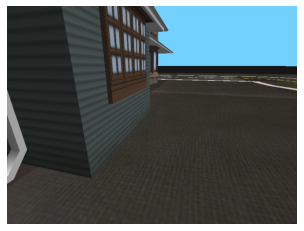

In [6]:
from IPython import display
env = DuckietownEnv(
        seed=seed,
        map_name=map_name,
        draw_curve=draw_curve,
        draw_bbox=draw_bbox,
        domain_rand=domain_rand,
        frame_skip=frame_skip,
        distortion=distortion,
        camera_rand=camera_rand,
        dynamics_rand=dynamics_rand,
    )

img = plt.imshow(env.render(mode='rgb_array'))
for i_episode in range(2):
    observation = env.reset()
    for t in range(100):
        #env.render()
        action = np.array([1.0, 0.0])
        img.set_data(env.render(mode='rgb_array')) 
        plt.axis('off')
        display.display(plt.gcf())
        display.clear_output(wait=True)
        observation, reward, done, info = env.step(action)
        print("step_count = %s, reward=%.3f" % (env.unwrapped.step_count, reward))
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()

